<div class='alert alert-info alert-block' align="center">
    <h1 >E-Commerce Product Categorization</h1>
</vdi>


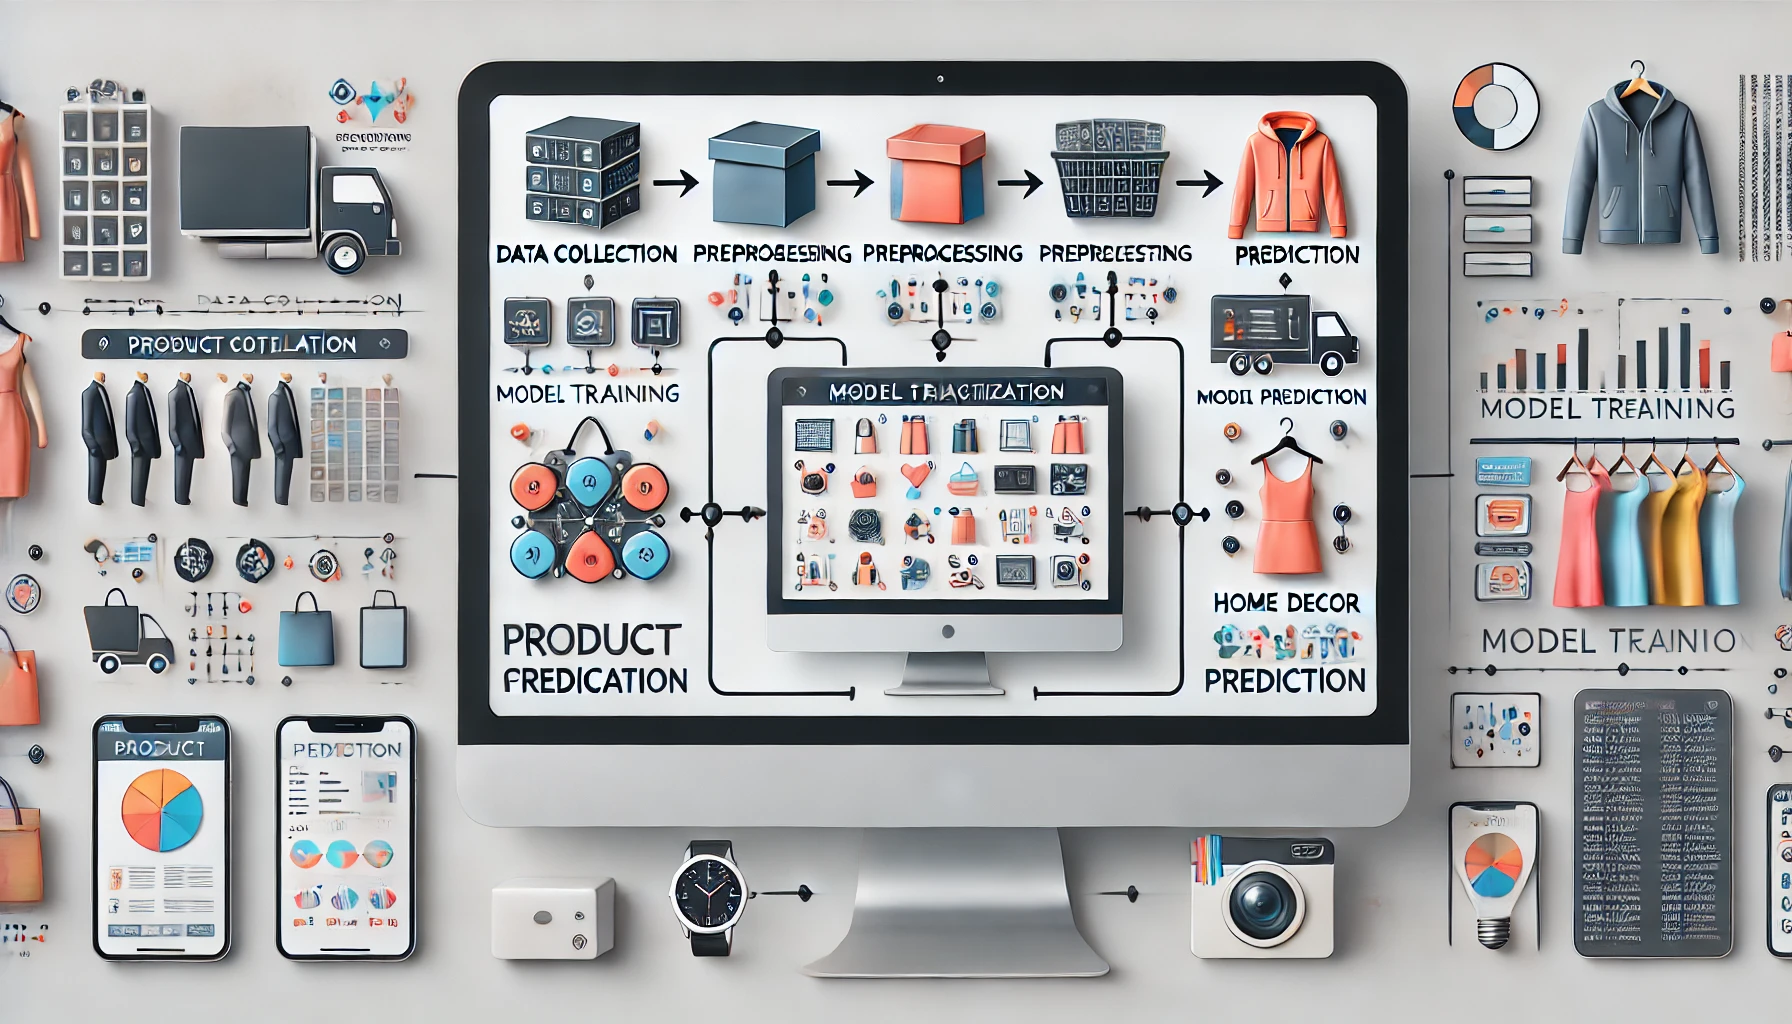

In [18]:
Image(r"Product_cat.png",width=1100)

In [1]:
# Importing basic libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


# import sklean libraries for Modeling training testing and evaluation
from sklearn.model_selection import train_test_split , GridSearchCV , KFold , cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , precision_score,recall_score , f1_score,confusion_matrix,ConfusionMatrixDisplay ,classification_report

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Libraries for LSTM model 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# importing Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize ,sent_tokenize
from nltk.stem import PorterStemmer

# for removing punctuation from sentence
import string 

# importing warnings library to ingnore warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

pd.set_option('display.max_colwidth', 100)

In [3]:
# getting all the files list present in the Current working directory
path = os.getcwd()
os.listdir(path)

['.ipynb_checkpoints',
 'count_of_products.png',
 'E-Commerce Product Categorization System Presentation.pptx',
 'E-commerce-product-categorization - Copy.ipynb',
 'E-commerce-product-categorization.ipynb',
 'Evaluation Guide for Learners.xlsx',
 'Hackathon 2.mp4',
 'Hackathon Details and Topic.docx',
 'lstm_product_categorization.h5',
 'Objectives and Outcomes - Hackathon.docx',
 'prduct_cat.png',
 'Product_cat.png',
 'score_card.JPG',
 'test_data.csv',
 'test_data.xlsx',
 'test_results.csv',
 'train_product_data.csv',
 'train_product_data.zip']

In [5]:
# Loading Training and Testing data

train_data = pd.read_csv(r"train_product_data.csv")
test_data = pd.read_csv(r"test_data.csv")
test_results = pd.read_csv(r"test_results.csv")

#### Train data

In [7]:
train_data.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-cycling-shorts/p/itmeh2ffvzetthbb?pid=SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/altht-3p-21-alisha-38-original-imaeh2d5vm5zbtgg.jp...",False,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications ...",No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 3""},..."


In [8]:
# getting all the columns names

print(list(train_data.columns))

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [9]:
# Train data details

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [13]:
# Checking null values in train data
train_data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [16]:
# checking duplicated values in test data
train_data.duplicated().sum()

0

#### Test data

In [19]:
test_data.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet/p/itme6nyhtzbaqjam?pid=BBAE6NYHCDTEZJTB,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-bracelet-armlet/j/t/b/v-v-art-handy-craft-bangles-vb54-...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bracelet only for Rs. 423 from Flipkart.com. Only Gen...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""VandV ART""}, {""key""=>""Collection"", ""value""..."


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  2534 non-null   object 
 1   crawl_timestamp          2534 non-null   object 
 2   product_url              2534 non-null   object 
 3   product_name             2534 non-null   object 
 4   pid                      2534 non-null   object 
 5   retail_price             2530 non-null   float64
 6   discounted_price         2530 non-null   float64
 7   image                    2534 non-null   object 
 8   is_FK_Advantage_product  2534 non-null   bool   
 9   description              2534 non-null   object 
 10  product_rating           2534 non-null   object 
 11  overall_rating           2534 non-null   object 
 12  brand                    2012 non-null   object 
 13  product_specifications   2529 non-null   object 
dtypes: bool(1), float64(2), 

In [23]:
# checking null in test data
test_data.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64

In [25]:
# checking duplicated values in test data
test_data.duplicated().sum()

0

#####
**As test data description has 0 null value and we are using only description column for modeling and prediction so we are not droping null**

<div class='alert alert-info alert-blcok' align="center">
    <h2>Data Cleaning</h2>
</div>


In [29]:
# getting null value % present in data
round((train_data.isnull().sum()/len(train_data))*100 , 2)

uniq_id                     0.00
crawl_timestamp             0.00
product_url                 0.00
product_name                0.00
product_category_tree       0.00
pid                         0.00
retail_price                0.38
discounted_price            0.38
image                       0.02
is_FK_Advantage_product     0.00
description                 0.01
product_rating              0.00
overall_rating              0.00
brand                      31.40
product_specifications      0.04
dtype: float64

In [31]:
# create new dataframe of only requireed columns

df_train = train_data[['description','product_category_tree']]

In [33]:
df_train.isnull().sum()

description              1
product_category_tree    0
dtype: int64

In [35]:
df_train.dropna(inplace=True)

In [37]:
df_train.shape

(14998, 2)

In [39]:
df_train.head(2)

,description,product_category_tree
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications ...",Clothing
1,"Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synth...",Footwear


<div align="center">
    <h1>Exploratory Data Analysis</h1>
</div>


In [42]:
df_train['product_category_tree'].nunique()

14

In [44]:
# Generate a summary of the percentage distribution of product categories in the dataset.

round(df_train['product_category_tree'].value_counts(normalize=True)*100 , 2)

product_category_tree
Clothing                      35.44
Jewellery                     21.46
Footwear                       7.22
Automotive                     6.25
Mobiles & Accessories          5.12
Home Decor & Festive Needs     4.76
Kitchen & Dining               4.07
Computers                      3.54
Watches                        3.51
Tools & Hardware               2.53
Toys & School Supplies         1.81
Pens & Stationery              1.76
Baby Care                      1.49
Bags, Wallets & Belts          1.05
Name: proportion, dtype: float64

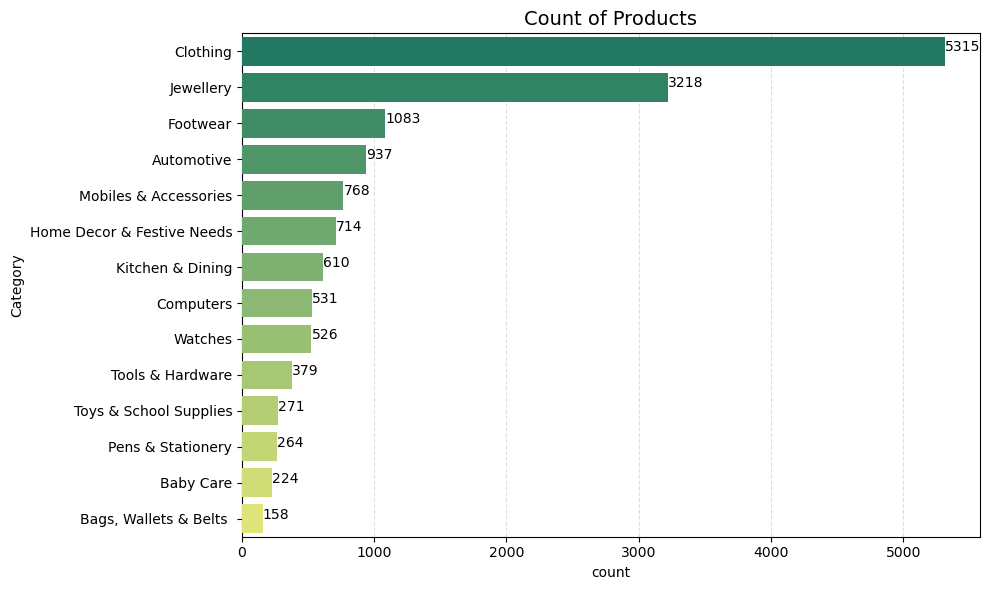

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, y='product_category_tree', palette='summer',
              order=df_train['product_category_tree'].value_counts().index,zorder = 5)

plt.title('Count of Products', fontsize=14)
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.4)

for index, value in enumerate(df_train['product_category_tree'].value_counts()):
    plt.text(value, index, str(value))

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(path, 'count_of_products.png'))

# Display the plot
plt.show()


**Clothing and Jewellery are the top selling category among all categories**

In [48]:
# creating new column character which has the total character are in description

df_train['characters'] = df_train['description'].apply(len)
df_train.head(1)

,description,product_category_tree,characters
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications ...",Clothing,410


In [49]:
# creating new column words which has the total words are in description

df_train['words'] = df_train['description'].astype('str').apply(lambda x : len(word_tokenize(x)))

In [50]:
# creating new column sentences which has the total sentences are in description

df_train['sentences'] = df_train['description'].astype('str').apply(lambda x : len(sent_tokenize(x)))

In [51]:
df_train.head(2)

,description,product_category_tree,characters,words,sentences
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications ...",Clothing,410,72,1
1,"Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synth...",Footwear,650,122,2


In [52]:
# Applying describe funtion to know about the statistic of data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
characters,14998.0,403.304174,397.603402,74.0,197.0,225.0,434.75,5309.0
words,14998.0,73.752500,73.808761,11.0,37.0,41.0,78.00,1065.0
sentences,14998.0,5.118682,3.439382,1.0,4.0,4.0,6.00,67.0


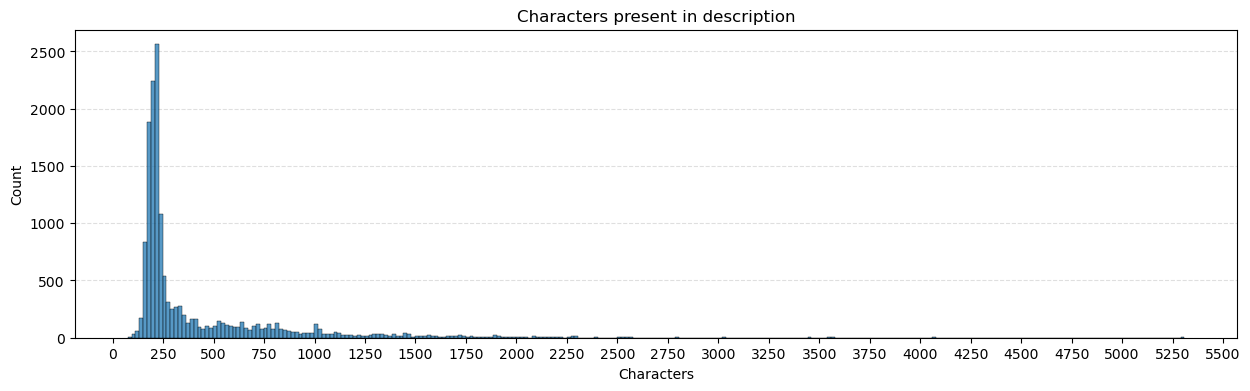

In [53]:
# Creating histogram to show the characters frequency 
plt.figure(figsize=(15,4))
sns.histplot(df_train , x = 'characters',zorder = 5)

plt.title('Characters present in description',fontsize=12)
plt.xlabel('Characters',fontsize=10)
plt.ylabel('Count',fontsize=10)

# Set x-axis ticks with smaller intervals
plt.xticks(ticks=range(0, max(df_train['characters']) + 250, 250))
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.show()

**Majority of description have fewer than 800 characters with a significant peak around 200 characters**

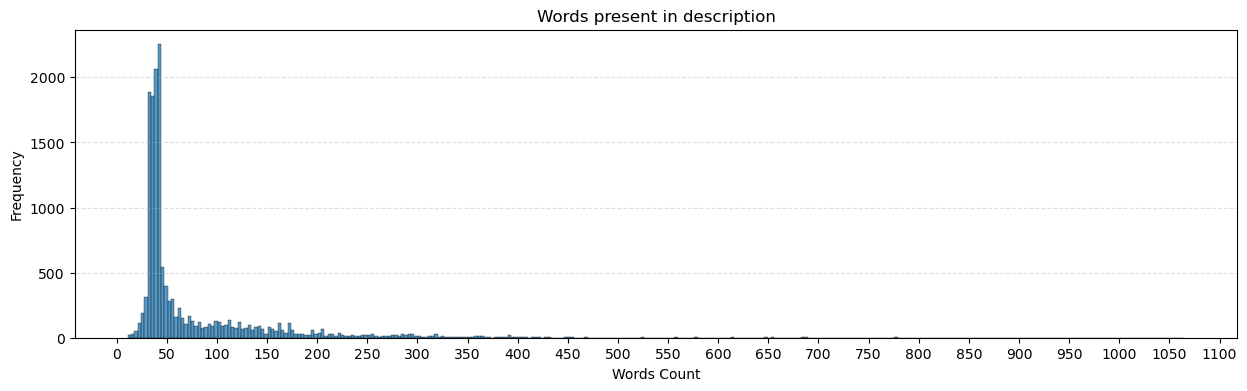

In [55]:
# Creating histogram to show the words frequency 
plt.figure(figsize=(15,4))
sns.histplot(df_train , x = 'words')

plt.title('Words present in description',fontsize=12)
plt.xlabel('Words Count',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.4)

# Set x-axis ticks with smaller intervals
plt.xticks(ticks=range(0, max(df_train['words']) + 50, 50))
plt.show()

**Majority of description have fewer than 180 words with a significant peak around 20-50 words**

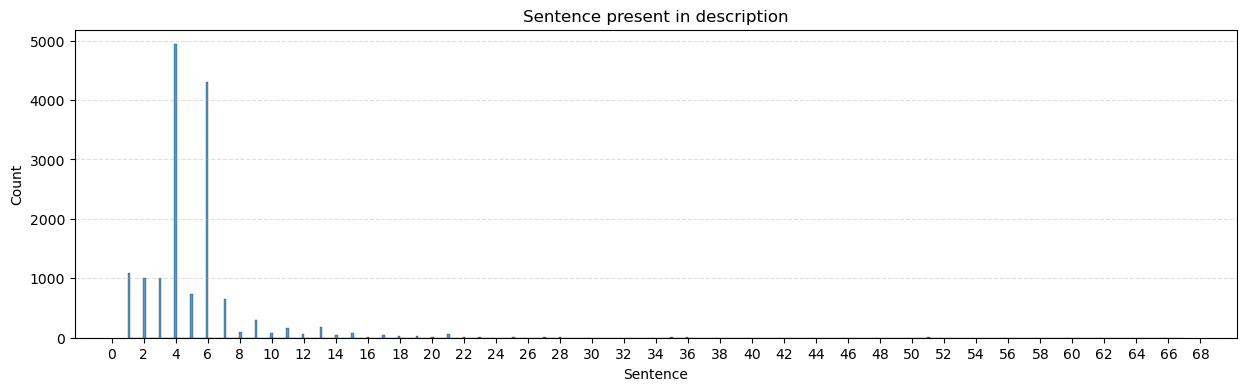

In [57]:
# Creating histogram to show the sentence frequency 
plt.figure(figsize=(15,4))
sns.histplot(df_train , x = 'sentences')

plt.title('Sentence present in description',fontsize=12)
plt.xlabel('Sentence',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.4)

# Set x-axis ticks with smaller intervals
plt.xticks(ticks=range(0, max(df_train['sentences']) + 2, 2))
plt.show()

**Majority of description have less than 7 sentences while peak at 4 -6 sentences**

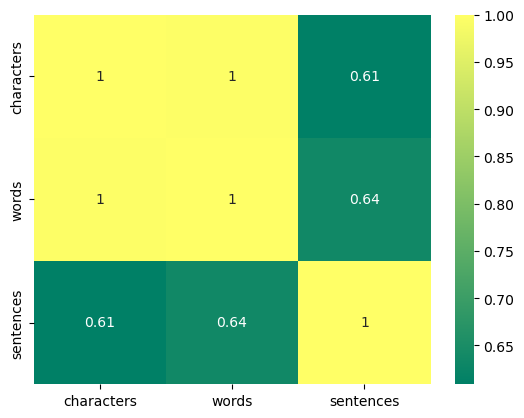

In [61]:
# Co-Relation between columns using heatmap
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='summer')
plt.show()

<Figure size 1500x800 with 0 Axes>

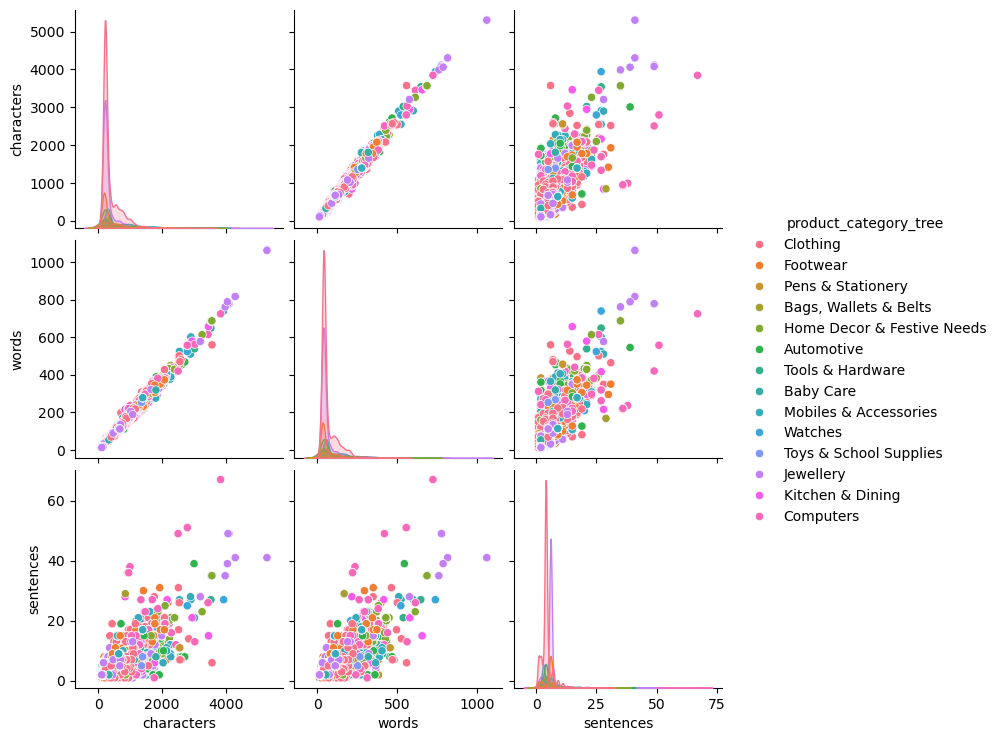

In [62]:
# Visualizing relationships between numerical features grouped by product categories

plt.figure(figsize=(15,8))
sns.pairplot(df_train,hue='product_category_tree')
plt.show()

**We can clearly see some outliers present in data**

<div class='alert alert-info alert-block' align="center">
    <h2>Data Preprocessing</h2>
</div>

In [65]:
ps = PorterStemmer()

In [66]:
# creating data_transform fucntion for description transformation
def data_transform(text):
    # conveting the text in lower format
    text = text.lower()
    # Tokenize the text into words
    text = nltk.word_tokenize(text)

    # getting only alpnumeric words
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:] # Updating text after filteration
    y.clear()

    # Removing Stopwords and Punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:] # Updating text after removing stopswords ans punctuation
    y.clear()

    # Stemming the words
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) # finally returning text again 

In [67]:
# Applying above data transformation on description column
df_train['clean_description'] = df_train['description'].apply(data_transform)

In [68]:
df_train.head(1)

,description,product_category_tree,characters,words,sentences,clean_description
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications ...",Clothing,410,72,1,key featur alisha solid women cycl short cotton lycra navi red navi specif alisha solid women cy...


In [69]:
# getting characters word and sentences for clean description columns

df_train['clean_characters']  = df_train['clean_description'].apply(len)
df_train['clean_words']  = df_train['clean_description'].apply(lambda x : len(word_tokenize(x)))
df_train['clean_sent']  = df_train['clean_description'].apply(lambda x : len(sent_tokenize(x)))
df_train.sample()

,description,product_category_tree,characters,words,sentences,clean_description,clean_characters,clean_words,clean_sent
8251,"Key Features of CrayonFlakes Baby Girl's Pyjama Light Blue, White Soft Micropile 100% Polyester ...",Baby Care,794,147,3,key featur crayonflak babi girl pyjama light blue white soft micropil 100 polyest polar fleec cr...,589,96,1


In [84]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
characters,14998.0,403.304174,397.603402,74.0,197.0,225.0,434.75,5309.0
words,14998.0,73.752500,73.808761,11.0,37.0,41.0,78.00,1065.0
sentences,14998.0,5.118682,3.439382,1.0,4.0,4.0,6.00,67.0
clean_characters,14998.0,272.007868,261.549215,32.0,132.0,162.0,297.00,3240.0
clean_words,14998.0,45.754234,43.011329,8.0,23.0,28.0,50.00,518.0
clean_sent,14998.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


**After applying transformation on descritpion column we can see that reduction in characters words and sentences**

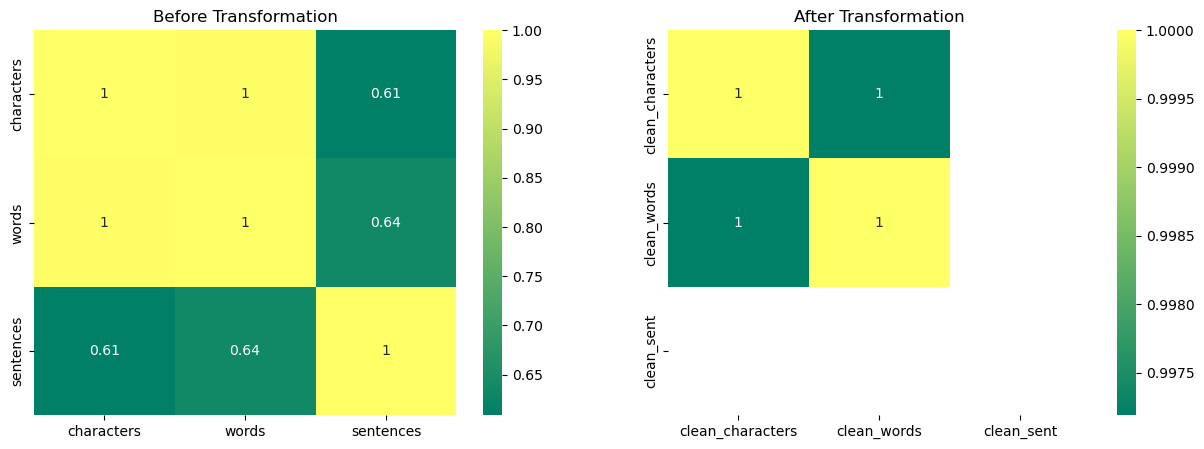

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Before Transformation',fontsize=12)
sns.heatmap(df_train[['characters', 'words','sentences']].corr(),annot=True,cmap='summer')

plt.subplot(1,2,2)
plt.title('After Transformation',fontsize=12)
sns.heatmap(df_train[['clean_characters', 'clean_words','clean_sent']].corr(),annot=True,cmap='summer')
plt.show()

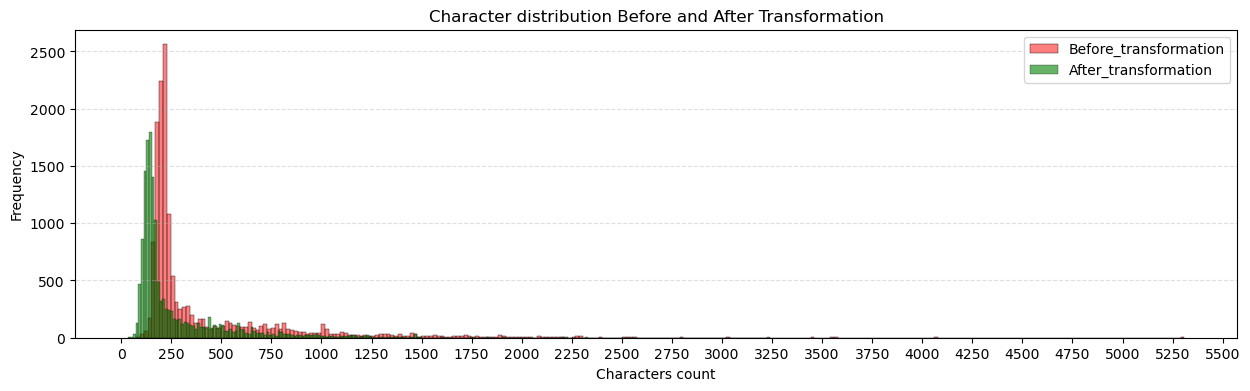

In [88]:
# visually showing the difference between before and after transformation

plt.figure(figsize=(15,4))
sns.histplot(df_train['characters'],color='red',alpha=0.5,label='Before_transformation')
sns.histplot(df_train['clean_characters'],color='green',alpha=0.6,label='After_transformation')
plt.legend()

plt.title('Character distribution Before and After Transformation')
plt.xlabel('Characters count')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.xticks(ticks=range(0, max(df_train['characters']) + 250, 250))

plt.show()

**After applying transformation we can see character count peak shift from 250 characters count to 125 character count**

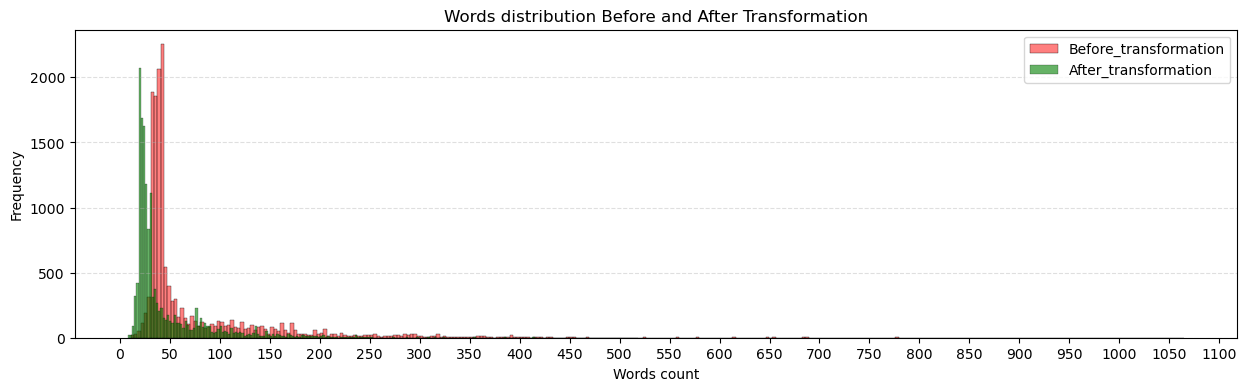

In [90]:
plt.figure(figsize=(15,4))
sns.histplot(df_train['words'],color='red',alpha=0.5,label='Before_transformation')
sns.histplot(df_train['clean_words'],color='green',alpha=0.6,label='After_transformation')
plt.legend()

plt.title('Words distribution Before and After Transformation')
plt.xlabel('Words count')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.xticks(ticks=range(0, max(df_train['words']) + 50, 50))

plt.show()

**After apply transformation we can clearly see that words count peak shift from 40 word count to 20 word count**

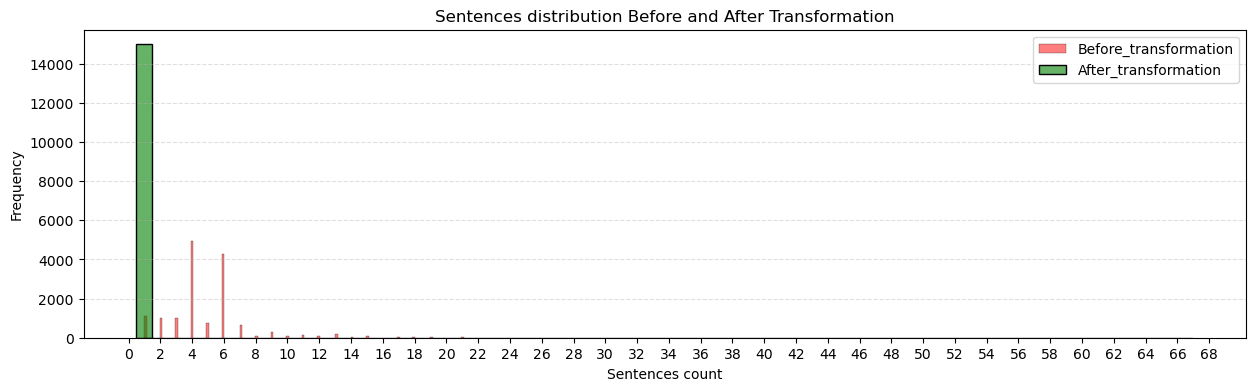

In [93]:
plt.figure(figsize=(15,4))
sns.histplot(df_train['sentences'],color='red',alpha=0.5,label='Before_transformation')
sns.histplot(df_train['clean_sent'],color='green',alpha=0.6,label='After_transformation')
plt.legend()

plt.title('Sentences distribution Before and After Transformation')
plt.xlabel('Sentences count')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.xticks(ticks=range(0, max(df_train['sentences']) + 2, 2))
plt.show()

**After applying transformation we can see that sentence peak 4-6 sentence count reduces to 1 sentence count**

<div class='alert alert-info alert-block' align="center"'>
    <h2>Outliers Handiling</h2>
</div>

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            14998 non-null  object
 1   product_category_tree  14998 non-null  object
 2   characters             14998 non-null  int64 
 3   words                  14998 non-null  int64 
 4   sentences              14998 non-null  int64 
 5   clean_description      14998 non-null  object
 6   clean_characters       14998 non-null  int64 
 7   clean_words            14998 non-null  int64 
 8   clean_sent             14998 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


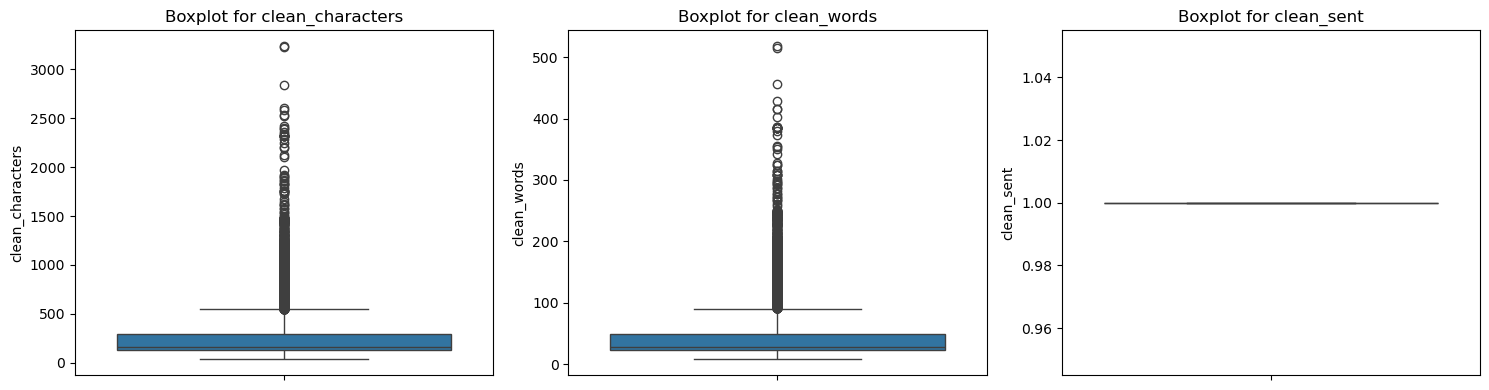

In [98]:
# Boxplots to detect outliers for numerical features
numeric_features = ['clean_characters', 'clean_words', 'clean_sent']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df_train[feature], ax=axes[i])  # Vertical boxplot for each feature
    axes[i].set_title(f'Boxplot for {feature}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**We can see the outliers present in the data by using boxplot**

In [101]:
# creating function for removing outliers from the data
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Apply outlier removal to all numerical features
for feature in numeric_features:
    df_train = remove_outliers(df_train, feature)

print("Shape after removing outliers:", df_train.shape)

Shape after removing outliers: (11698, 9)


<div class= 'alert alert-info alert-block' align="center">
    <h2>Model Building | Prediction | Evaluation</h2>
</div>

In [107]:
lg=LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()
mnb = MultinomialNB()

cv = CountVectorizer(max_features=5000)
tfidf = TfidfVectorizer(max_features=5000)

encoder = LabelEncoder()

In [109]:
# Creating an empty dataframe for storing the scores
score_card = pd.DataFrame(columns=['model_name', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score'])

# Creating update_score_card function to update the score in the score_card dataframe
def update_score_card(y_test, y_pred, model):  

    # Assigning score_card as global
    global score_card

    # Appending the scores in the score_card dataframe
    score_card = pd.concat([score_card, pd.DataFrame([{
        'model_name': model,
        'Accuracy_score': accuracy_score(y_test, y_pred),
        'Precision_score': precision_score(y_test, y_pred, average='weighted'),
        'Recall_score': recall_score(y_test, y_pred, average='weighted'),
        'F1_score': f1_score(y_test, y_pred, average='weighted')
    }])], ignore_index=True)

In [111]:
score_card

,model_name,Accuracy_score,Precision_score,Recall_score,F1_score


<div class='alert alert-info alert-block' align='center'>
    <h2>CountVectorizer Method</h2>
</div>

In [115]:
# Applying above data transformation on description column of test data
test_data['clean_description'] = test_data['description'].apply(data_transform)

In [117]:
# applying CountVectorizer on test data
X_test = cv.fit_transform(test_data['clean_description'])

In [119]:
# applying encoding on result data
test_results['product_category_tree_encoded'] = encoder.fit_transform(test_results['product_category_tree'])

y_test=test_results['product_category_tree_encoded'].values

In [121]:
# printing the shape of test data

print(X_test.shape) 
print(y_test.shape)

(2534, 5000)
(2534,)


In [123]:
# Applying Countvectorizer on train data
X_train = cv.fit_transform(df_train['clean_description']).toarray()

In [125]:
# encoding product category tree column
df_train['Category_encoded'] = encoder.fit_transform(df_train['product_category_tree'])

In [127]:
y_train=df_train['Category_encoded'].values

In [129]:
# printing the shape of test data

print(X_train.shape) 
print(y_train.shape)

(11698, 5000)
(11698,)


<div class='alert alert-info alert-block' align='center'>
    <h3>MultinomialNB </h3>
</div>

##### Training data

In [133]:
# training data and getting score on train data 
mnb.fit(X_train , y_train)
y_pred = mnb.predict(X_train)
f1_score(y_train,y_pred,average='weighted')

0.9629717337288041

<Figure size 800x400 with 0 Axes>

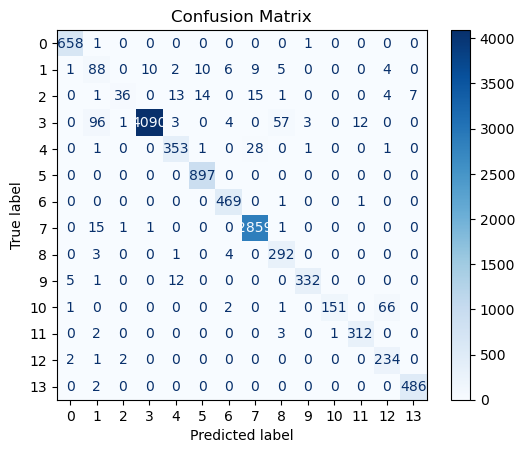

In [134]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [137]:
# updating score for train data
update_score_card(y_train , y_pred,'MultinomialNB-Train')

##### Testing Data

In [140]:
# Testing on test data

y_pred=mnb.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.004797098210909365

##### Cross val score

In [143]:
# calculating cross val score using KFold 
score = cross_val_score(mnb,X_train,y_train ,cv = KFold(5),scoring='accuracy').mean()
score

0.8711795529538154

In [145]:
# updating score for test data
update_score_card(y_test , y_pred,'MultinomialNB-Test')

<div class='alert alert-info alert-block' align='center'>
    <h3>RandomForestClassifier </h3>
</div>

##### Training data

In [151]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_train)
f1_score(y_train,y_pred,average='weighted')

0.9994013645237512

<Figure size 800x400 with 0 Axes>

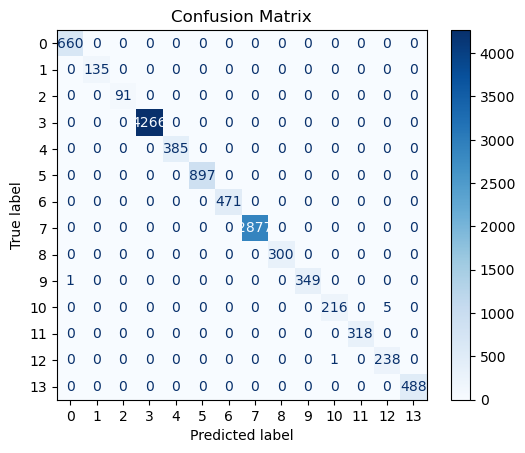

In [152]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [155]:
# updating score for train data
update_score_card(y_train , y_pred,'RandomForestClassifier-Train')

##### Testing data

In [158]:
# Testing on test data

y_pred=rfc.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.18522050164529374

In [160]:
# calculating cross val score using KFold 
score = cross_val_score(rfc,X_train,y_train ,cv = KFold(5),scoring='accuracy').mean()
score

0.8888705817008511

In [162]:
# updating score-card for test data
update_score_card(y_test,y_pred,'RandomForestClassifier-Test')

<div class='alert alert-info alert-block' align='center'>
    <h3>LogisticRegression</h3>
</div>

In [165]:
# fitting and predicting train data
lg.fit(X_train , y_train)
y_pred = lg.predict(X_train)
f1_score(y_train,y_pred,average='weighted')

0.998714476103093

<Figure size 800x400 with 0 Axes>

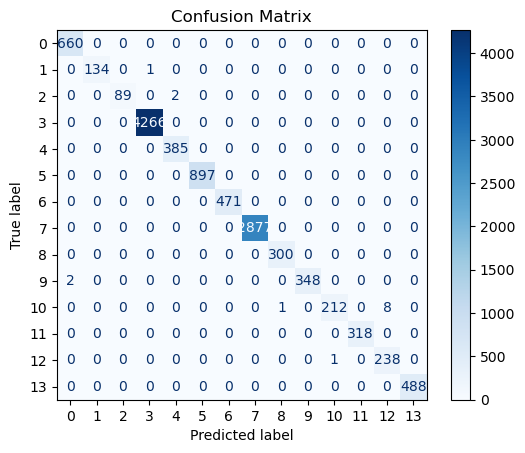

In [166]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [167]:
# updating score for train data
update_score_card(y_train , y_pred,'LogisticRegression-Train')

##### predicting Test data

In [169]:
y_pred = lg.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.12629209855735765

##### cross val score

In [171]:
# calculating cross val score using KFold 
score = cross_val_score(lg,X_train,y_train ,cv = KFold(5),scoring='accuracy').mean()
score

0.9216978546606592

In [177]:
# updating score for train data
update_score_card(y_test , y_pred,'LogisticRegression-Test')

<div class='alert alert-info alert-block' align='center'>
    <h3>Hypertuning the models</h3>
</div>

In [181]:
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier()
}

param_grids = {
    'MultinomialNB': {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
}

best_models = {}

for model_name in models:
    print(f"Training {model_name}")
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Training MultinomialNB
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for MultinomialNB: {'alpha': 2.0}
Accuracy: 0.042620363062352014
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.04      0.01      0.02       259
           2       0.05      0.97      0.09       107
           3       0.00      0.00      0.00       882
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       215
           7       0.00      0.00      0.00       313
           8       0.08      0.03      0.04        37
           9       0.00      0.00      0.00       331
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        59
          13       0.00      0.00      0.00         4

    accuracy            

In [183]:
# all above models are not performing well on test data

<div class = 'alert alert-info alert-block' align='center'>
    <h3>TfidfVectorizer</h3>
</div>

In [187]:
# fitting and transforming data using TfidfVectorizer
X_train = tfidf.fit_transform(df_train['clean_description']).toarray()
X_train.shape

(11698, 5000)

<div class = 'alert alert-info alert-block' align='center'>
    <h4>RandomForest Classifier</h4>
</div>

In [193]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_train)
f1_score(y_train,y_pred,average='weighted')

0.9994016559809412

<Figure size 800x400 with 0 Axes>

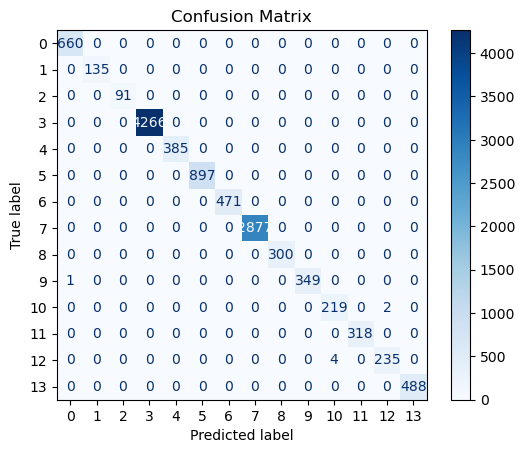

In [194]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [195]:
# updating score for train data
update_score_card(y_train , y_pred,'tfdif-RandomForestClassifier-Train')

##### cross val score

In [197]:
# calculating cross val score using KFold 
score = cross_val_score(rfc,X_train,y_train ,cv = KFold(5),scoring='accuracy').mean()
score

0.8809197078158173

In [198]:
# predicting on test data
y_pred = lg.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.12629209855735765

In [199]:
# updating score for test data
update_score_card(y_test , y_pred,'tfdif-RandomForestClassifier-Test')

<div class = 'alert alert-info alert-block' align='center'>
    <h4>Logistic Regression</h4>
</div>

In [205]:
# fitting and predicting on train data
lg.fit(X_train, y_train)
y_pred = lg.predict(X_train)
f1_score(y_train,y_pred,average='weighted')

0.9883933587167183

<Figure size 800x400 with 0 Axes>

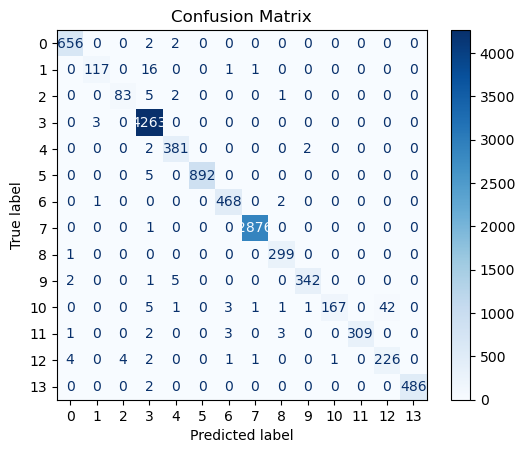

In [206]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [207]:
# updating score for train data
update_score_card(y_train , y_pred,'tfdif-LogisticRegression-Train')

In [208]:
# calculating cross val score using KFold 
score = cross_val_score(lg,X_train,y_train ,cv = KFold(5),scoring='accuracy').mean()
score

0.8967365336198171

In [209]:
# predicting test data
y_pred = lg.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.24224309420330842

In [210]:
# updating score for test data
update_score_card(y_test , y_pred,'tfdif-LogisticRegression-Test')

<div class = 'alert alert-info alert-block' align='center'>
    <h4>MulitnomialNB</h4>
</div>

In [221]:
# fitting and predicting train data
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_train)
f1_score(y_train,y_pred,average='weighted')

0.946108800142246

<Figure size 800x600 with 0 Axes>

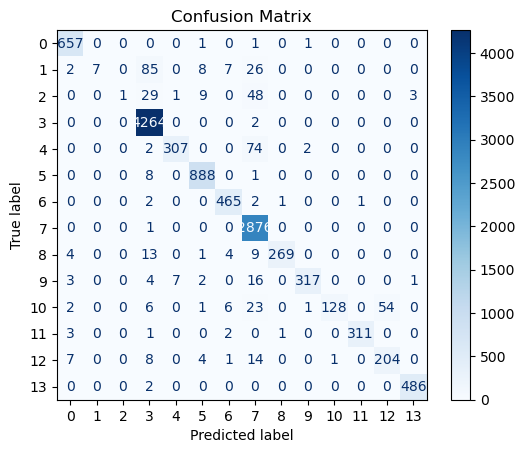

In [222]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [223]:
# updating score for train data
update_score_card(y_train , y_pred,'tfdif-Multinomial-Train')

In [225]:
# calculating cross val score using KFold 
score = cross_val_score(mnb,X_train,y_train ,cv = KFold(5),scoring='accuracy').mean()
score

0.8314282164560062

In [226]:
# predicting on test data
y_pred = mnb.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.03730132570907429

In [227]:
# updating score for test data
update_score_card(y_test , y_pred,'tfdif-Multinomial-Test')

<div class = 'alert alert-info alert-block' align='center'>
    <h4>Hypertuning the models (TF-IDF)</h4>
</div>

In [234]:
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier()
}

param_grids = {
    'MultinomialNB': {'alpha': [0.1, 0.5, 1.0, 2.0]},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20]}
}

best_models = {}

for model_name in models:
    print(f"Training {model_name}")
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Training MultinomialNB
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for MultinomialNB: {'alpha': 0.1}
Accuracy: 0.04538279400157853
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.05      0.03      0.04       259
           2       0.05      0.98      0.09       107
           3       0.00      0.00      0.00       882
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       215
           7       0.00      0.00      0.00       313
           8       0.07      0.05      0.06        37
           9       0.00      0.00      0.00       331
          10       0.00      0.00      0.00        49
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        59
          13       0.00      0.00      0.00         4

    accuracy             

In [236]:
# above all models are performing well on train data but performing poor on test data

In [238]:
score_card

,model_name,Accuracy_score,Precision_score,Recall_score,F1_score
0,MultinomialNB-Train,0.962301,0.968189,0.962301,0.962972
1,MultinomialNB-Test,0.042620,0.005347,0.042620,0.004797
2,RandomForestClassifier-Train,0.999402,0.999407,0.999402,0.999401
3,RandomForestClassifier-Test,0.340568,0.129170,0.340568,0.185221
4,LogisticRegression-Train,0.998718,0.998736,0.998718,0.998714
5,LogisticRegression-Test,0.140884,0.130423,0.140884,0.126292
6,tfdif-RandomForestClassifier-Train,0.999402,0.999403,0.999402,0.999402
7,tfdif-RandomForestClassifier-Test,0.140884,0.130423,0.140884,0.126292
8,tfdif-LogisticRegression-Train,0.988631,0.989004,0.988631,0.988393
9,tfdif-LogisticRegression-Test,0.296369,0.217645,0.296369,0.242243


<div class='alert alert-info alert-block' align='center'>
    <h2>Deep learning method(LSTM-Long Short Term Memory)</h2>
</div>

In [250]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Embedding, Dense, LSTM, Dropout ,BatchNormalization , GlobalMaxPool1D , Bidirectional
from keras.utils import plot_model

from transformers import BertTokenizer, TFBertModel, DistilBertTokenizer, TFDistilBertModel

In [252]:
df_train.head(1)

,description,product_category_tree,characters,words,sentences,clean_description,clean_characters,clean_words,clean_sent,Category_encoded
0,"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications ...",Clothing,410,72,1,key featur alisha solid women cycl short cotton lycra navi red navi specif alisha solid women cy...,314,53,1,3


In [254]:
# Assuming 'product_description' and 'product_category_tree' columns
X = df_train['clean_description'].values
y = df_train['product_category_tree'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert categories to integers

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
# Tokenize and pad sequences
max_words = 10000  # Max number of words to keep
max_len = 200      # Max length of sequences

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [258]:
model = Sequential()

model.add(Embedding(10000,128,input_length=250,input_shape=(250,)))
model.add(Bidirectional(LSTM(128 ,return_sequences=True )))
model.add(Dropout(0.2))

model.add(GlobalMaxPool1D())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14 , activation='softmax'))

In [274]:
# Displays the layer-wise details, output shapes, and number of trainable parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 250, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           462 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,686,988 (17.88 MB)

 Trainable params: 1,562,286 (5.96 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 3,124,574 (11.92 MB)

In [262]:
plot_model(model,to_file='model_structure.png',show_shapes=True,show_layer_names=True)
plt.show()

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [264]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [266]:
callback = EarlyStopping(
    monitor='val_loss', 
    patience=5,          
    restore_best_weights=True,
    min_delta = 0.001
)

In [268]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test),callbacks=callback)

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 142s 418ms/step - accuracy: 0.7301 - loss: 1.0046 - val_accuracy: 0.9658 - val_loss: 0.4813
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 121s 412ms/step - accuracy: 0.9725 - loss: 0.1096 - val_accuracy: 0.9782 - val_loss: 0.0882
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 125s 427ms/step - accuracy: 0.9848 - loss: 0.0521 - val_accuracy: 0.9795 - val_loss: 0.0799
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 124s 422ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9829 - val_loss: 0.0626
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 124s 423ms/step - accuracy: 0.9939 - loss: 0.0233 - val_accuracy: 0.9791 - val_loss: 0.0864
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 124s 423ms/step - accuracy: 0.9928 - loss: 0.0259 - val_accuracy: 0.9829 - val_loss: 0.0877
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 124s 424ms/step - accuracy: 0.9967 - loss: 0.0123 - val_accuracy: 0.9821 - val_loss: 0.0762
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 125s 427ms/step - accuracy: 0.9930 -

In [270]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", test_acc)

# Save the model
model.save(os.path.join(path, 'lstm_product_categorization.h5'))

74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9852 - loss: 0.0593


Test Accuracy: 0.9829059839248657


In [272]:
# Predict categories
predictions = model.predict(X_test_pad)
predicted_labels = np.argmax(predictions, axis=1)

# Decode labels
predicted_categories = label_encoder.inverse_transform(predicted_labels)

74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


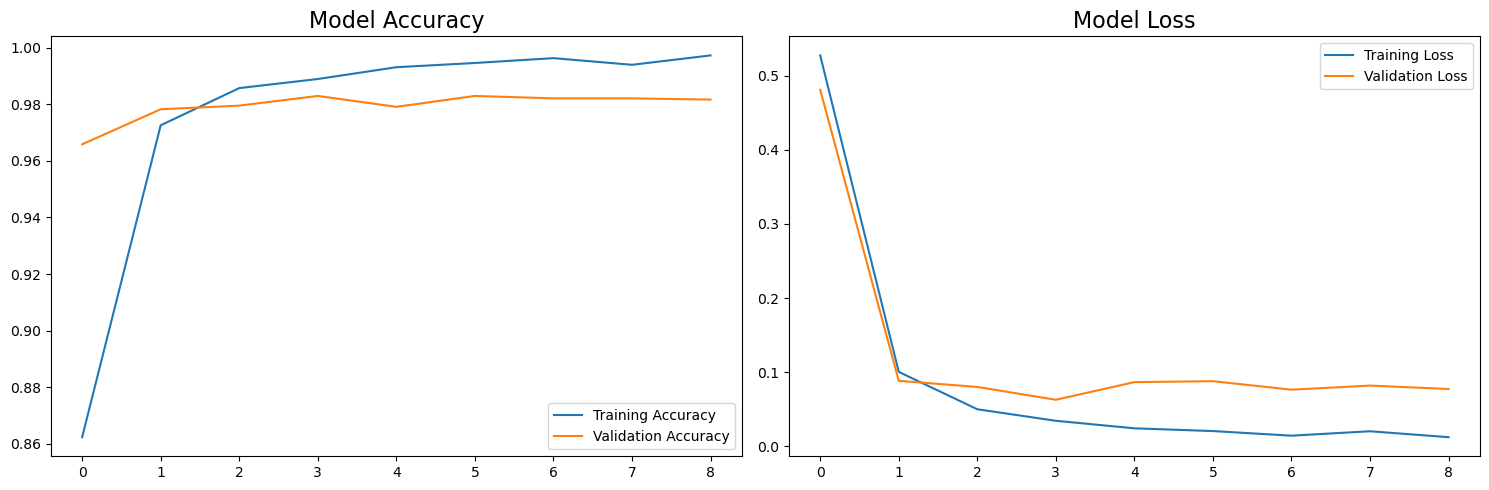

In [280]:
plt.figure(figsize=(15, 5))

# View available metrics
print(history.history.keys())

# Plot accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy',fontsize=16)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss',fontsize=16)

# Display both subplots
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()
